Links I referenced:
- https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays
- https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html



In [61]:
import numpy as np
from numpy import asarray
import PIL
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

Automatically created module for IPython interactive environment


In [62]:
imgpath = "IMG2.jpg"

## Load image using Pillow

In [63]:
imagePIL = Image.open(imgpath)

print(imagePIL.format)
print(imagePIL.size)
print(imagePIL.mode)

# show the image (will open in Preview)
# image.show()

JPEG
(2048, 1365)
RGB


## Load image using Matplotlib

uint8
(1365, 2048, 3)


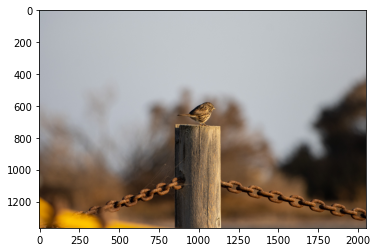

In [64]:
imageMPL = image.imread(imgpath)

print(imageMPL.dtype)
print(imageMPL.shape)

pyplot.imshow(imageMPL)
pyplot.show()

## Convert image to numpy array

In [65]:
np_array = asarray(imagePIL)
print(np_array.shape)

(1365, 2048, 3)


## Do the clustering

In [66]:
n_colors = 64

# Convert to floats instead of the default 8 bits integer coding. Dividing by 255 is important so that plt.imshow behaves works well on float data (need to be in the range [0-1])
np_array = np.array(np_array, dtype=np.float64) / 255

# Load image and transform to a 2D numpy array
w, h, d = original_shape = tuple(np_array.shape)
np_2d = np.reshape(np_array, (w * h, d))

In [67]:
# Fit kmeans model on small sub-sample of the data and get labels for all points

np_2d_sample = shuffle(np_2d, random_state=0)[:1000]

print("Fitting k-means model on a small sub-sample of the data")
t0 = time()
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(np_2d_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels

print("Predicting color indices on the full image (k-means)")
t0 = time()
labelsK = kmeans.predict(np_2d)
print("done in %0.3fs." % (time() - t0))

Fitting k-means model on a small sub-sample of the data
done in 0.217s.
Predicting color indices on the full image (k-means)
done in 0.071s.


In [68]:
# Fit and predict using agglomerative model

# print("Fitting and predicting using agglomerative model")
# t0 = time()
# labelsA = AgglomerativeClustering(n_clusters = 2).fit_predict(np_2d)
# print("done in %0.3fs." % (time() - t0))

In [69]:
# Fit and predict DBSCAN

# print("Fitting and predicting with DBSCAN (this takes about 2 mins to print)")
# t0 = time()
# labelsDB = DBSCAN(eps = 0.0005, min_samples = 20).fit_predict(np_2d)
# print("done in %0.3fs." % (time() - t0))
# print(labelsDB)

In [70]:
# Random colors

codebook_random = shuffle(np_2d, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, np_2d, axis=0)
print("done in %0.3fs." % (time() - t0))

Predicting color indices on the full image (random)
done in 2.839s.


In [71]:
# Recreate the (compressed) image from the code book & labels

def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

def rci2(labels, w, h):
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = labels[label_idx]
            label_idx += 1
    return image

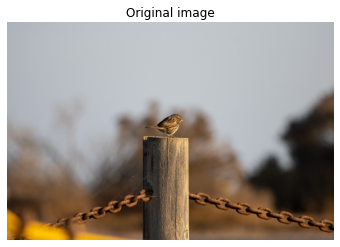

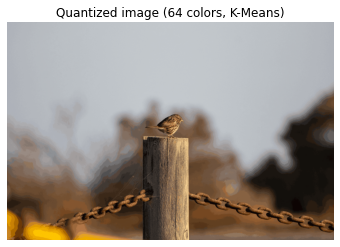

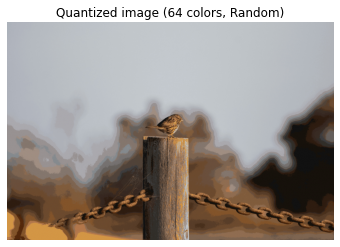

In [72]:
# Display all results, alongside original image

# og
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(np_array)

# kmeans
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labelsK, w, h))

# agglo
# plt.figure(3)
# plt.clf()
# plt.axis('off')
# plt.title('Quantized image (64 colors, Agglomerative)')
# plt.imshow(rci2(labelsA, w, h))

# dbscan
# plt.figure(4)
# plt.clf()
# plt.axis('off')
# plt.title('Quantized image (DBSCAN)')
# plt.imshow(recreate_image(kmeans.cluster_centers_, labelsDB, w, h))

# random
plt.figure(5)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()